## Installing Dependencies

In [1]:
%pip install --quiet --upgrade diffusers transformers scipy mediapy

     |████████████████████████████████| 236 kB 5.3 MB/s 
     |████████████████████████████████| 5.3 MB 54.8 MB/s 
     |████████████████████████████████| 163 kB 71.4 MB/s 
     |████████████████████████████████| 7.6 MB 46.3 MB/s 
     |████████████████████████████████| 1.6 MB 53.7 MB/s 


## Hugging Face

To be able to run this notebook, a "HuggingFace🤗 Hub token" is mandatory. This token is personal!

In order to obtain such token, you need to accept a "CreativeML OpenRAIL-M license", which explicitly states that:
> `You cannot use the model to deliberately produce nor share illegal or harmful outputs or content.`

Moreover, as for the DALL·E model, you are asked to abide to the following statement:


> `Do not create or disseminate images that create hostile or alienating environments for people. This includes images that people would find disturbing, distressing, or offensive; or content that propagates stereotypes.`

In [2]:
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your termin

In [12]:
from diffusers import PNDMScheduler, DDIMScheduler, LMSDiscreteScheduler

scheduler = PNDMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", skip_prk_steps=True)
# scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear")
# scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear")

In [13]:
import mediapy as media
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"
remove_safety = False


pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16, revision="fp16", use_auth_token=True)
if remove_safety:
  pipe.safety_checker = lambda images, clip_input: (images, False)
pipe = pipe.to(device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


  0%|          | 0/51 [00:00<?, ?it/s]

""

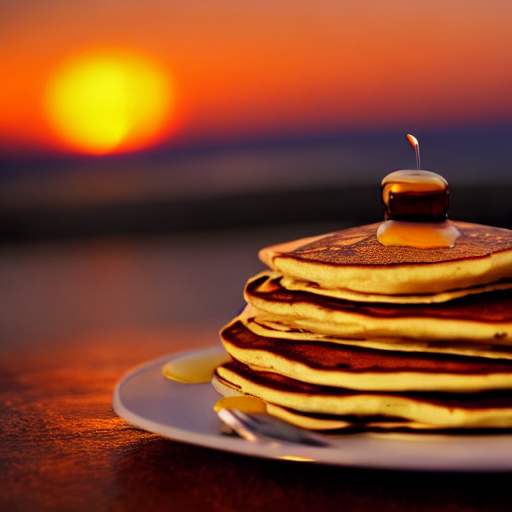

In [34]:
prompt = "pancakes with a beautiful sunset, 4k, high resolution" #@param {type:"string"}
num_images = 1    # number of images to display

prompts = [ prompt ] * num_images
with autocast("cuda"):
    images = pipe(prompts, guidance_scale=7.5, num_inference_steps=50)["sample"]  
    
media.show_images(images)
images[0].save("output.jpg")